In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [80]:
# 데이터 처리 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline 
plt.style.use('seaborn') # 'seaborn' 폰트로 변경
sns.set(font_scale=2.5) # 폰트 크기 설정


# 경고 창 생략
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [59]:
#데이터 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 주요하게 다루어 보고자 하는 Feature는 Pclass , Age, SibSp, Parch, Fare 이고 Target label은 Survived이다.

In [60]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **1.1 Null data check**
* null data를 좀 더 보기 편하도록 시각화 하여 살펴본다.

In [62]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [63]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* train, test 모두에서 age, cabin null 존재 각 20%, 80%
* tarin에서만 Embarked null 존재함 확인. 약 0.22%

* MANO 라이브러리를 사용하여 그래프로 볼 수 있다.

<Axes: >

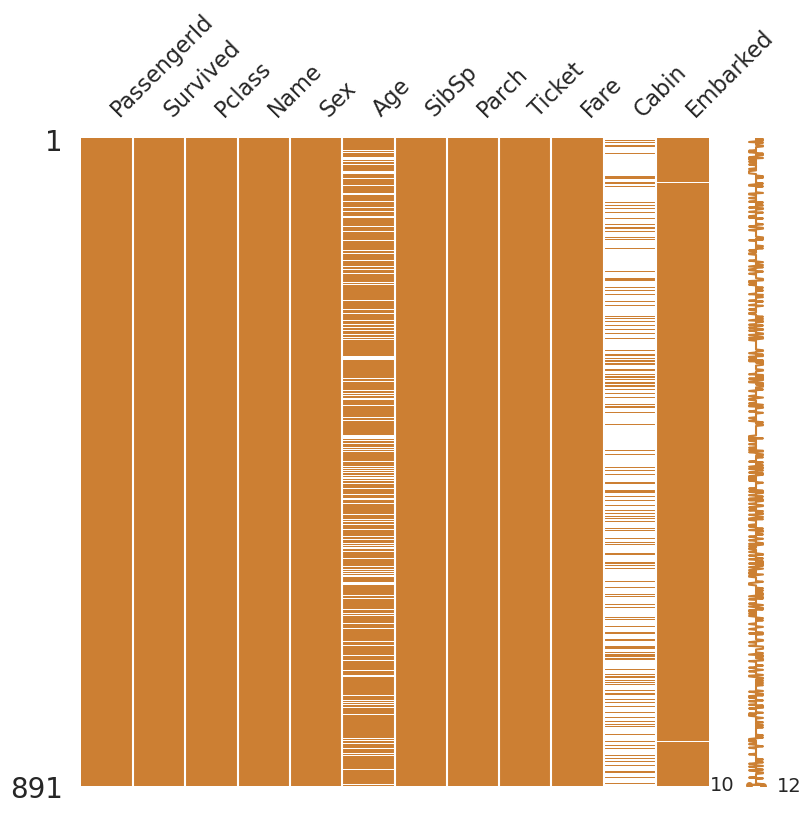

In [64]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

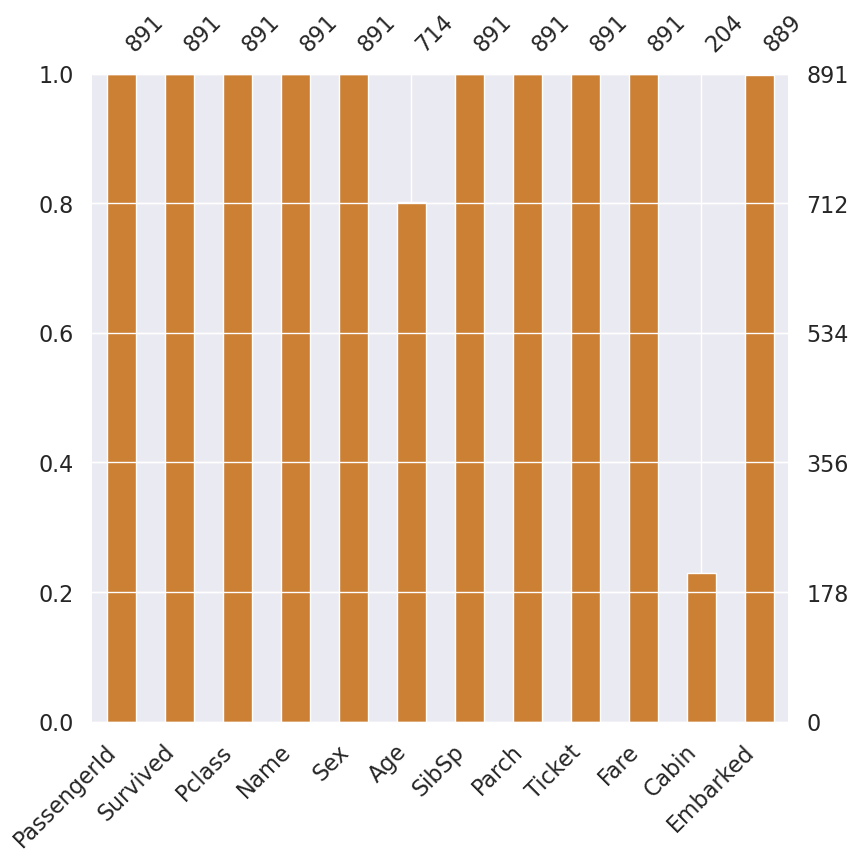

In [65]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

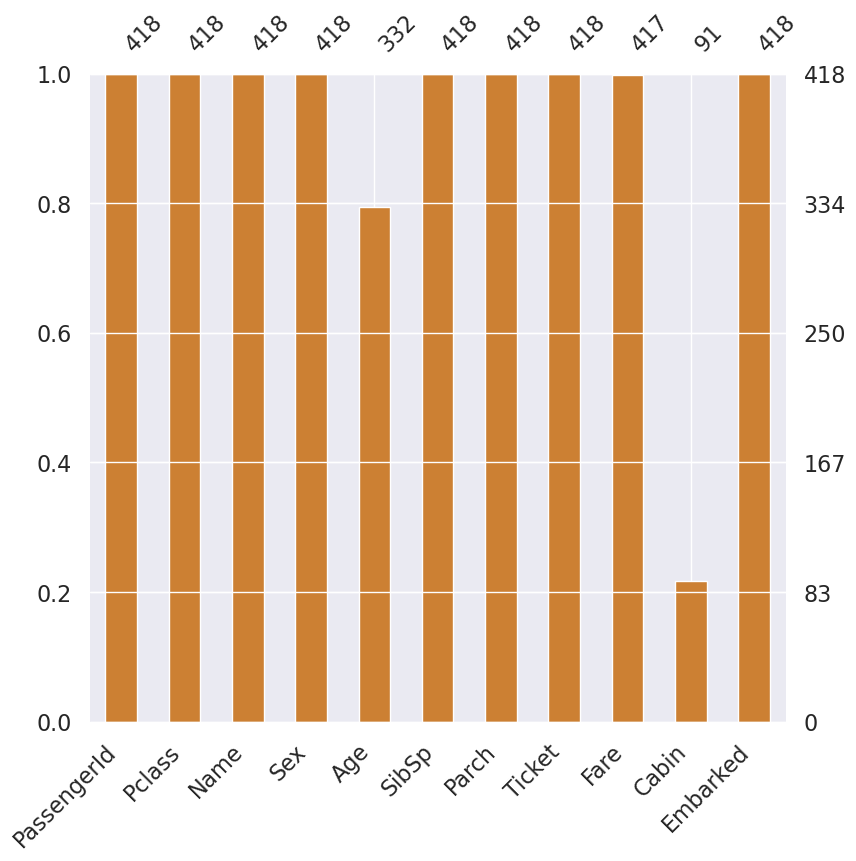

In [66]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# **1.2 Target label 확인**
* target label이 어떤 분포를 가지고 있는지 확인해본다.
* binary classification problem에서 1과 0의 분포에 따라 모델의 평가 방법이 달라진다.

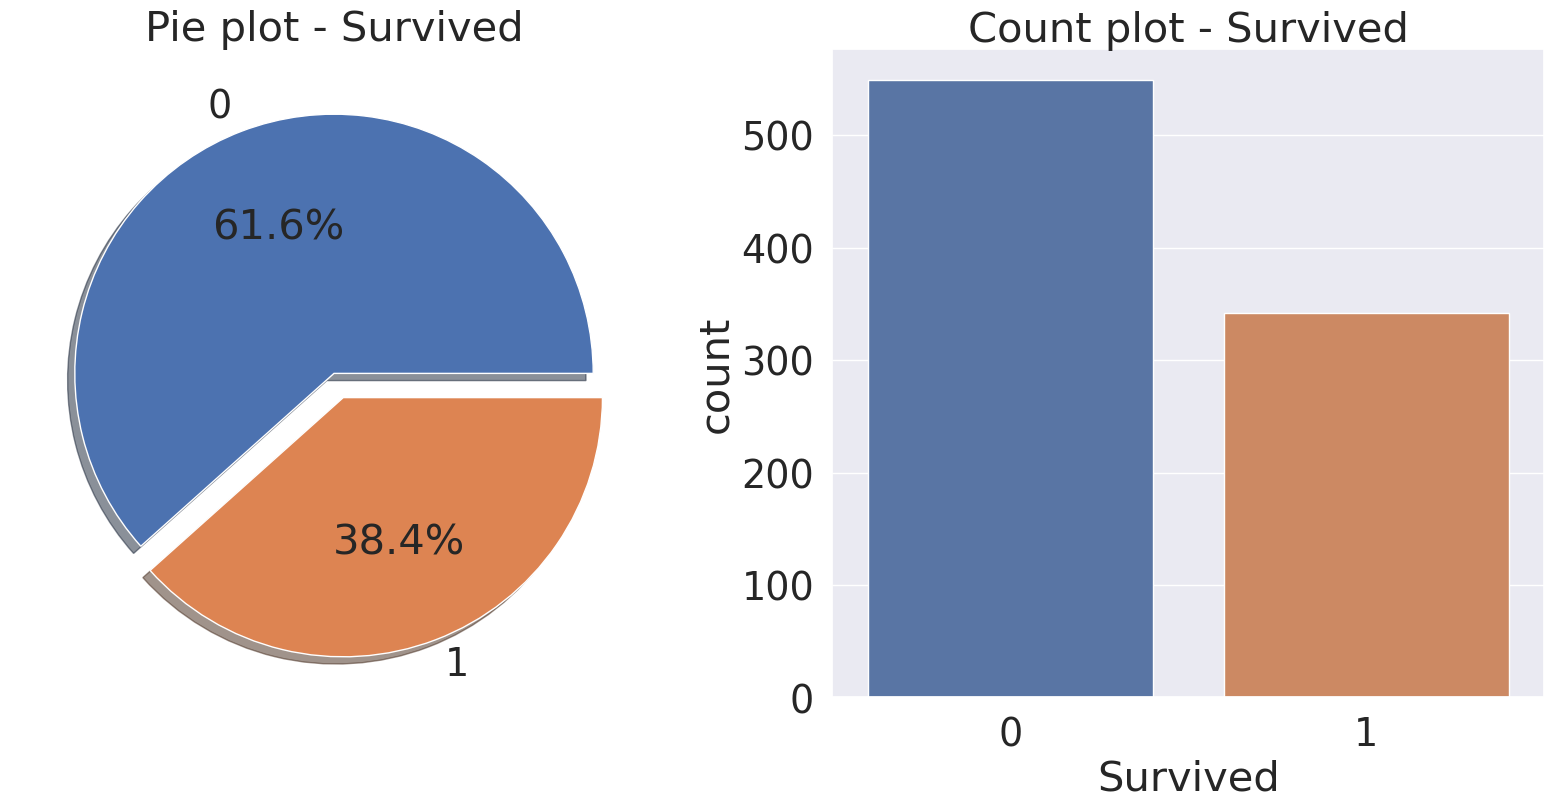

In [68]:
#plt
#pie / count
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

* target label의 분포 균일하다.
* 타겟의 분포가 불균일하게 이루어져 있을 경우 100중 1이 99, 등 모델이 모든것을 1이라고 판단해도 정확도는 99퍼로 측정하기 때문에 원하는 결과 줄 수 없음.

# 2.EDA

# 2.1 Pclass (객실등급)
* Pclass는 ordinal,  서수. 카테고리이면서 순서가 있는 데이터 타입
* Pclass에 따른 생존률의 차이를 본다. Groupby, pivot
* Pclass와 survived Pclass로 묶음. 이 count를 평균내면 각 Pclass별 생존률이 나옴.
* 각 class에 몇명이 있는지 확인할 수 있고 전체 인원중 생존한 사람의 총 합을 구할 수 있다.

In [69]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [70]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* pandas corsstab 이용하여 더 쉽게 본다.

In [71]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* 객체에 mean()취하면 각 클래스별 생존율을 얻을 수 있다.<br>
* ex) if class 1
$$\frac{80}{(80+136)} ≈ 0.63$$

<Axes: xlabel='Pclass'>

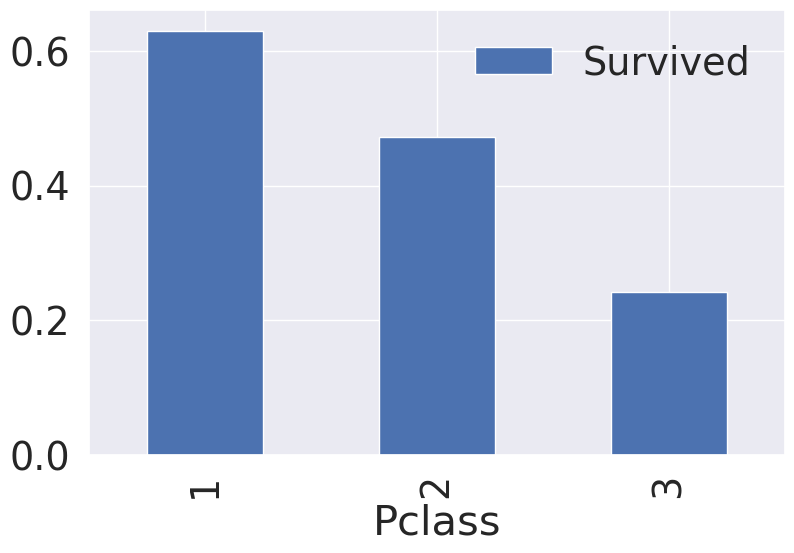

In [72]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

* Pclass가 좋을수록 생존율이 높은 것을 확인해 볼 수 있다.
* countplot을 이용해서 특정 label에 따른 개수를 확인해볼 수 있다.

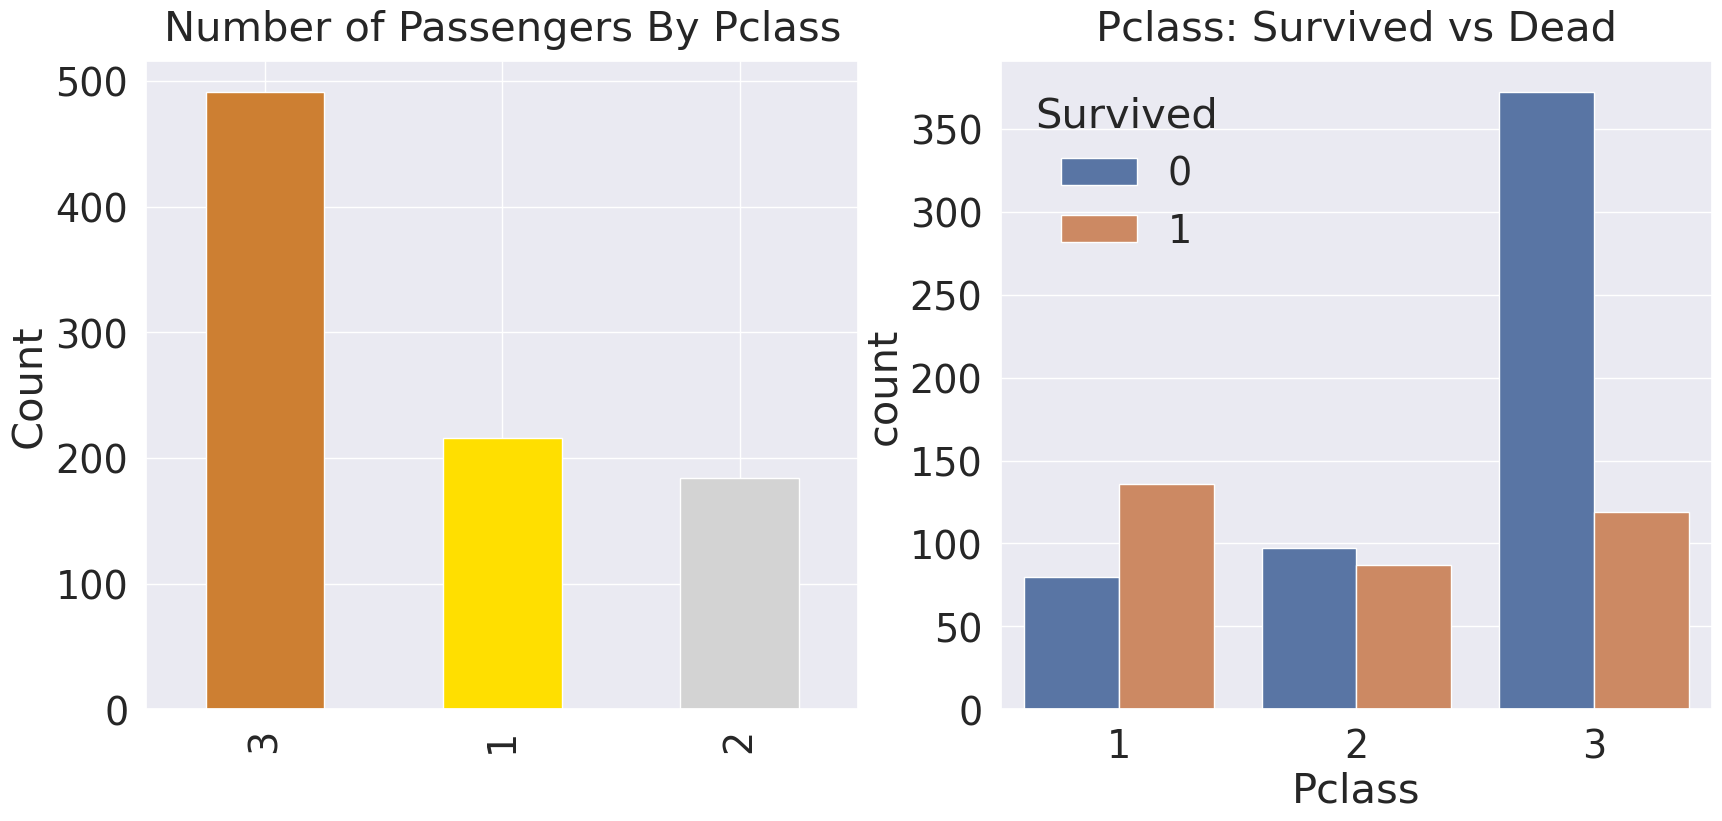

In [74]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1]) #x= 축 명시해줘야함
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 2.2 Sex (성별)
* 성별에 따라 달라지는 생존율 확인
* 동일하게 groupby seaborn countplot 사용

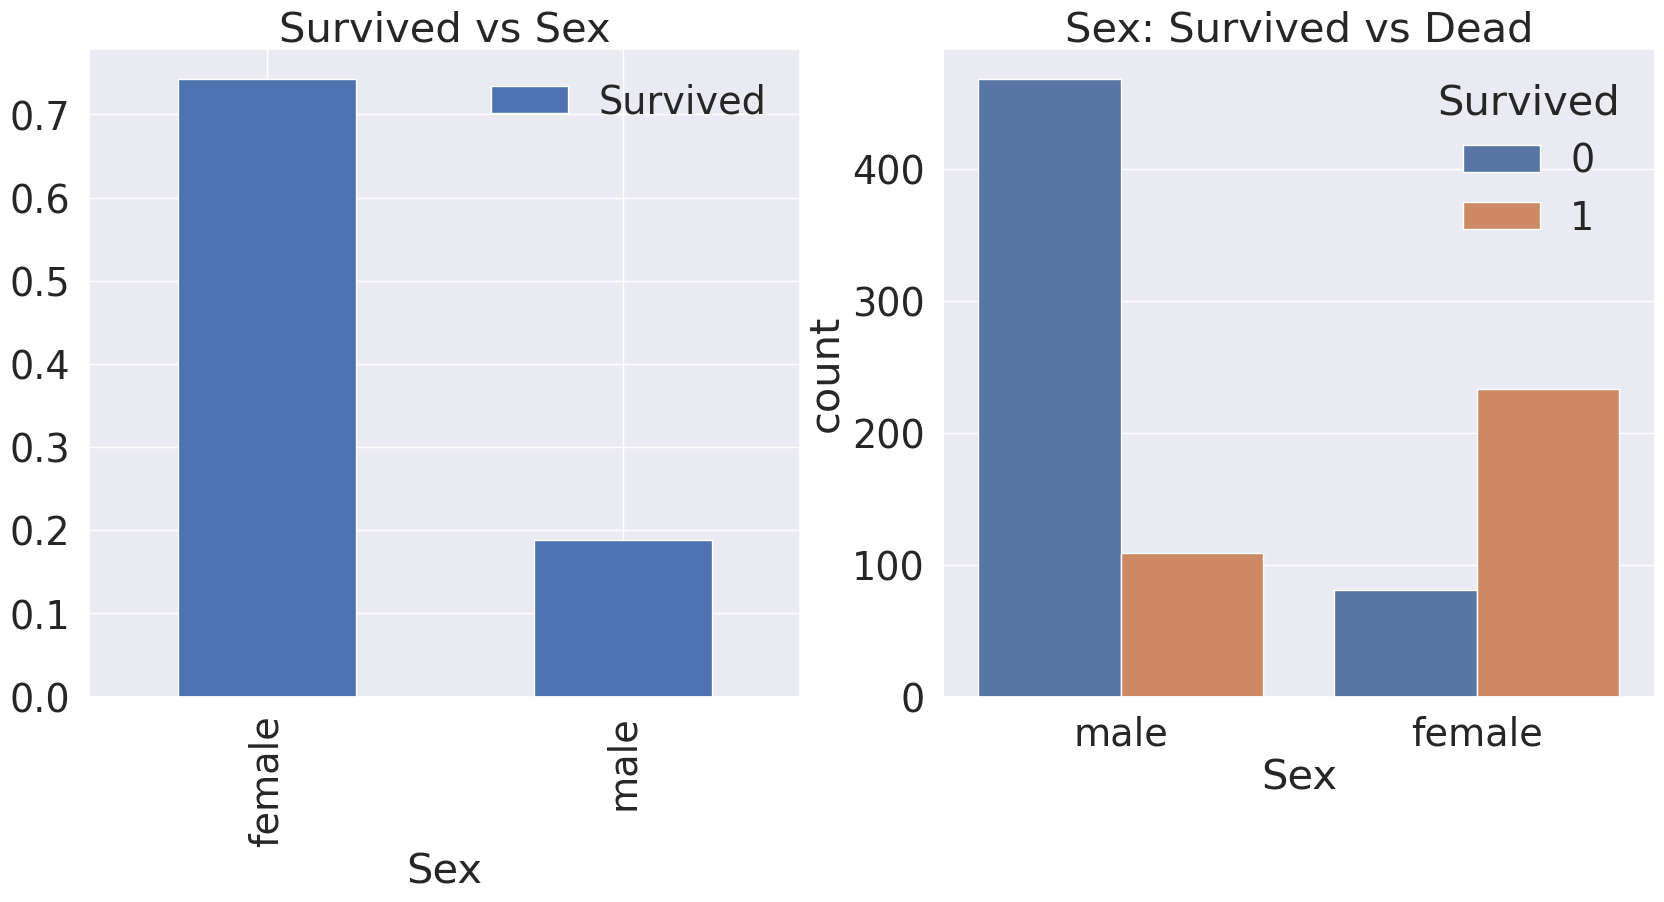

In [75]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

* 여자가 생존할 확률이 높은 것 확인 가능

In [76]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [77]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* 예측모델에 쓰일 feature로 선택 가능

# 2.3 Both (Pclass, Sex)
* 두 요소에 대하여 생존율이 어떻게 달라지는지 확인해본다.

In [87]:
pd.crosstab([df_train.Sex,df_train.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

# 2.4 Age

In [90]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


* 생존에 따른 age의 histogram 그려본다.

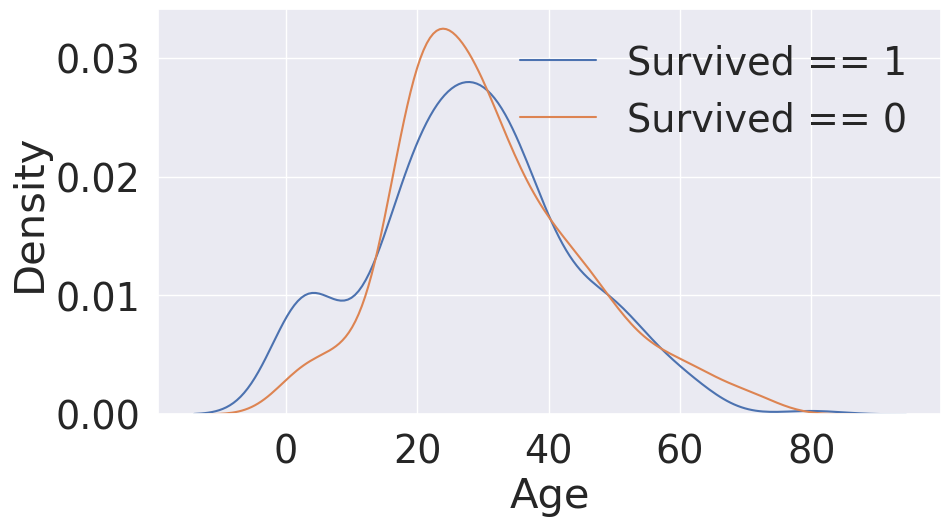

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

* 생존자 중에서 나이가 어린 경우가 많다.

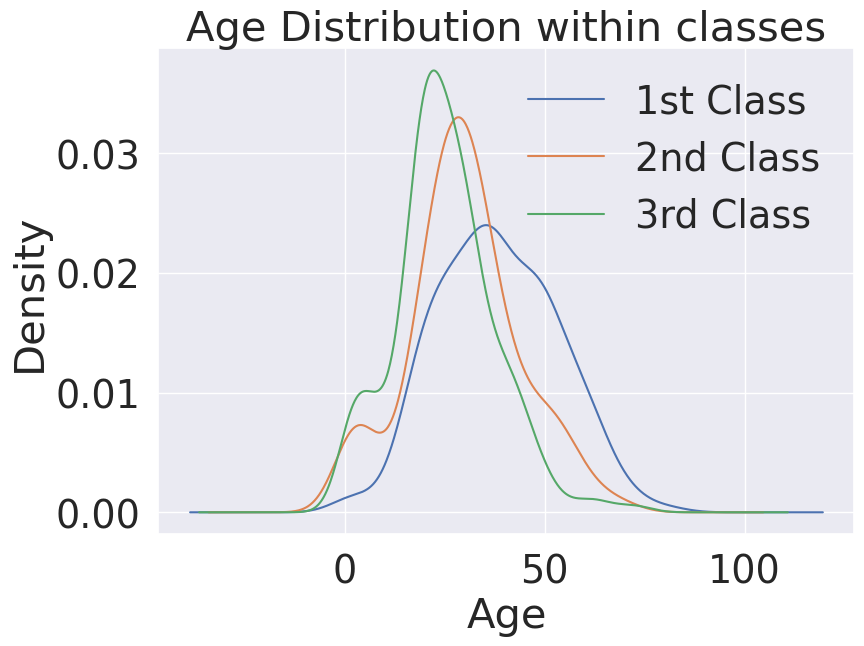

In [92]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* 나이가 많을수록 class가 높은 사람이 많아짐을 확인
* 나이대를 더 넓혀서 생존율이 어떻게 분포하는지 확인해본다.

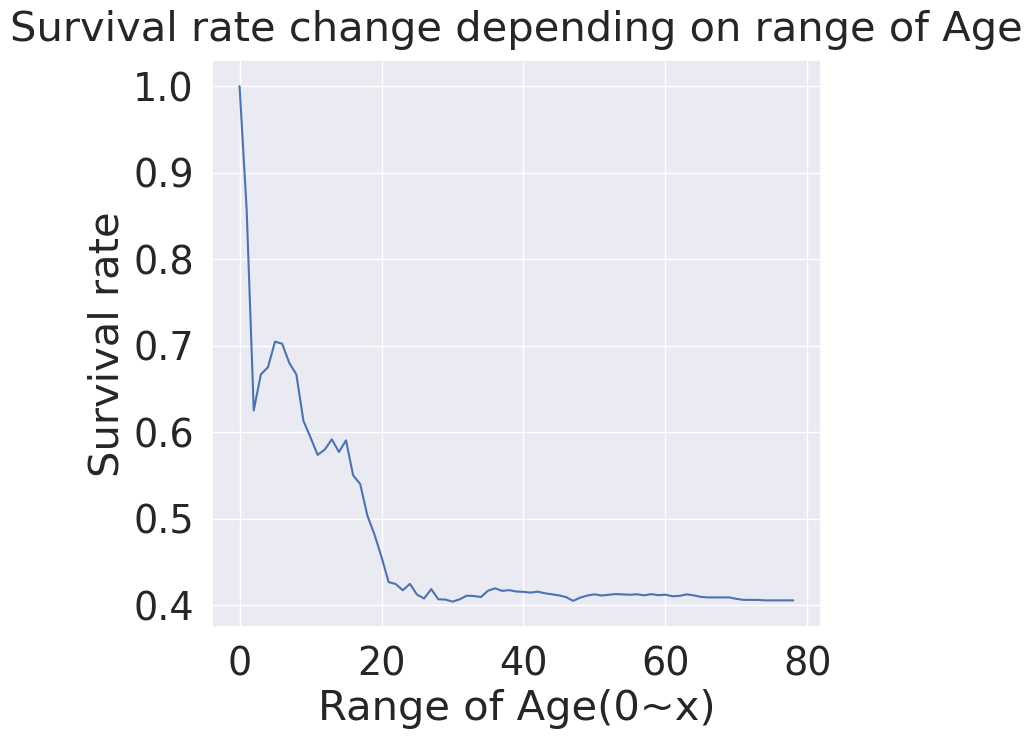

In [93]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

* 나이가 어릴수록 생존율이 높음을 확인
* Age또한 주요 feature로 사용 가능함을 확인

# 2.5 Pclass, Sex, Age

* Sex, Pclass, Age, survived 모두에 대해서 보고자한다.
* violinplot 사용
* x축에  Sex, Pclass/ y축에 보고싶은 Age 

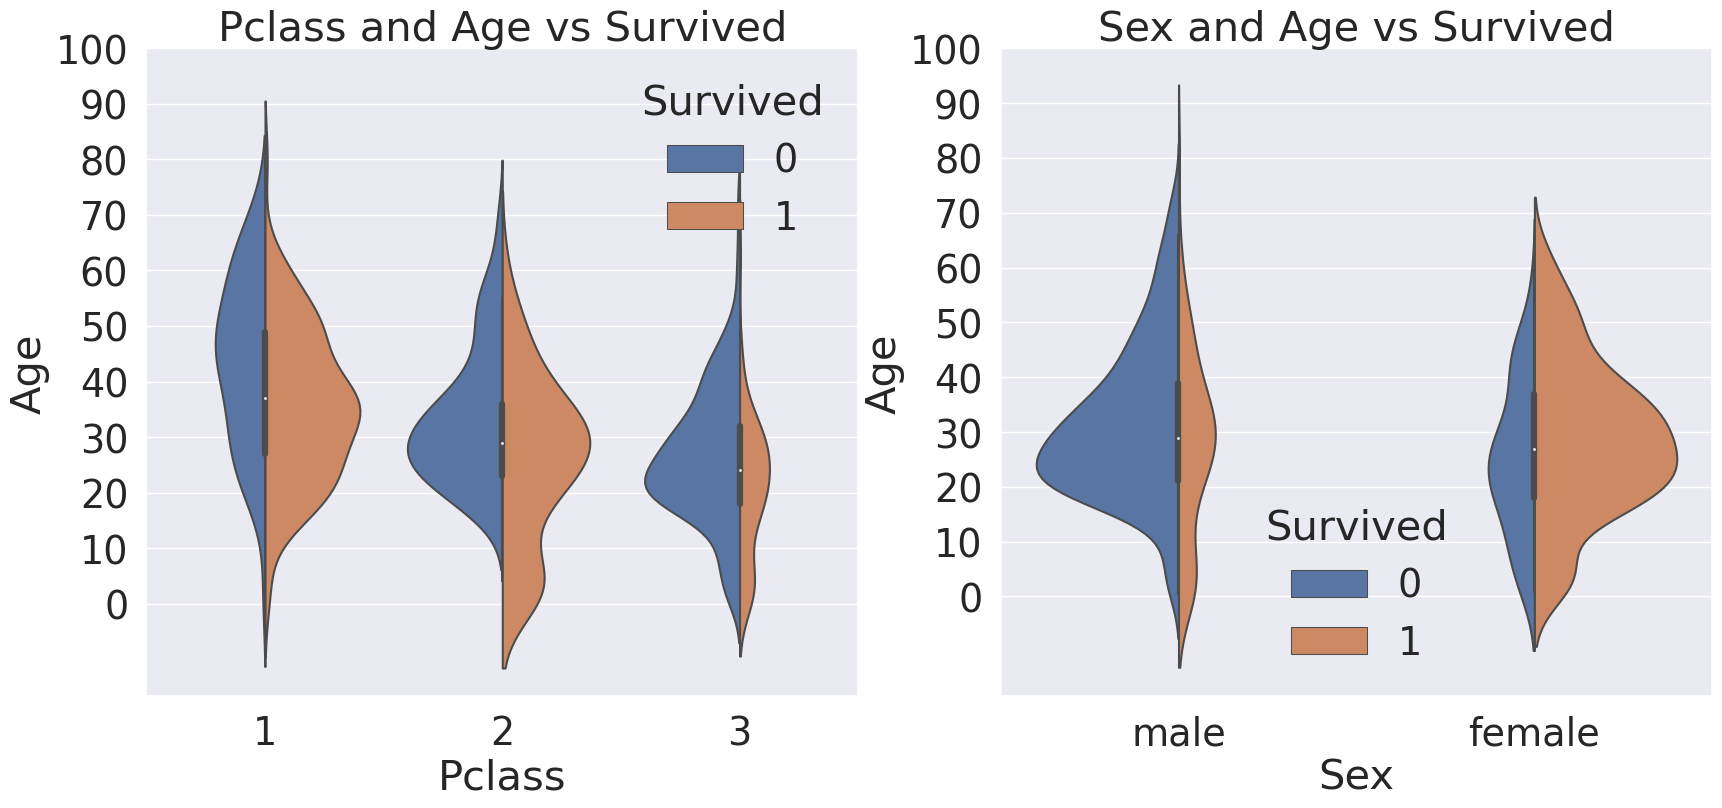

In [96]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 오른쪽, pclass별로 age의 분포가 어떻게 달라지는지, 그에 따른 생존여부를 구분한 그래프이다.
* 왼쪽, 위와 같이 sex에 따른 분포, 생존여부
* 모든 클래스에서 나이가 어릴수록 많이 생존했음을 확인할 수 있다.
* 오른쪽에선 여자가 더 많이 생존했음을 볼 수 있다.

# 2.6 Embarked
* 탑승한 항구를 나타내는 지표
* 위에서 진행햇던 동일한 방식으로 탑승한 곳에 따른 생존율을 확인해본다.

<Axes: xlabel='Embarked'>

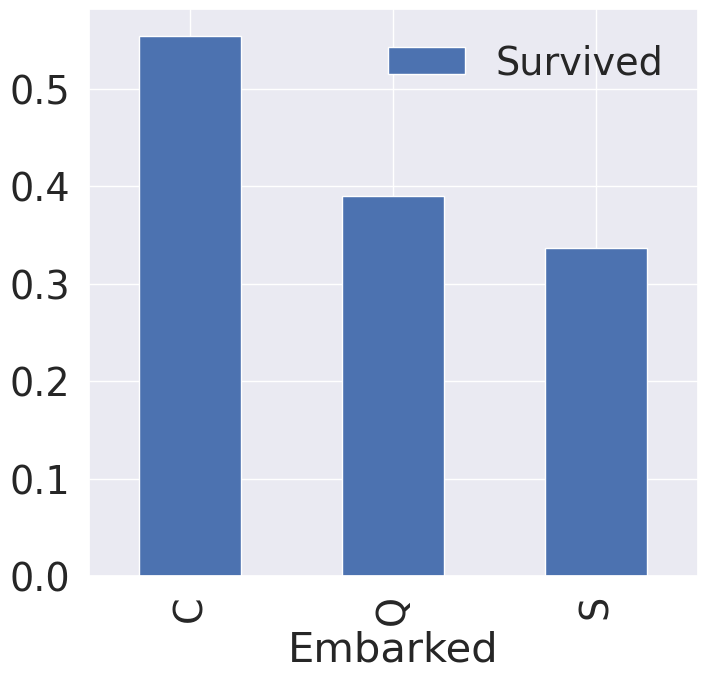

In [97]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

* C를 제외하고 Q, S 생존율은 비슷하게 보인다.

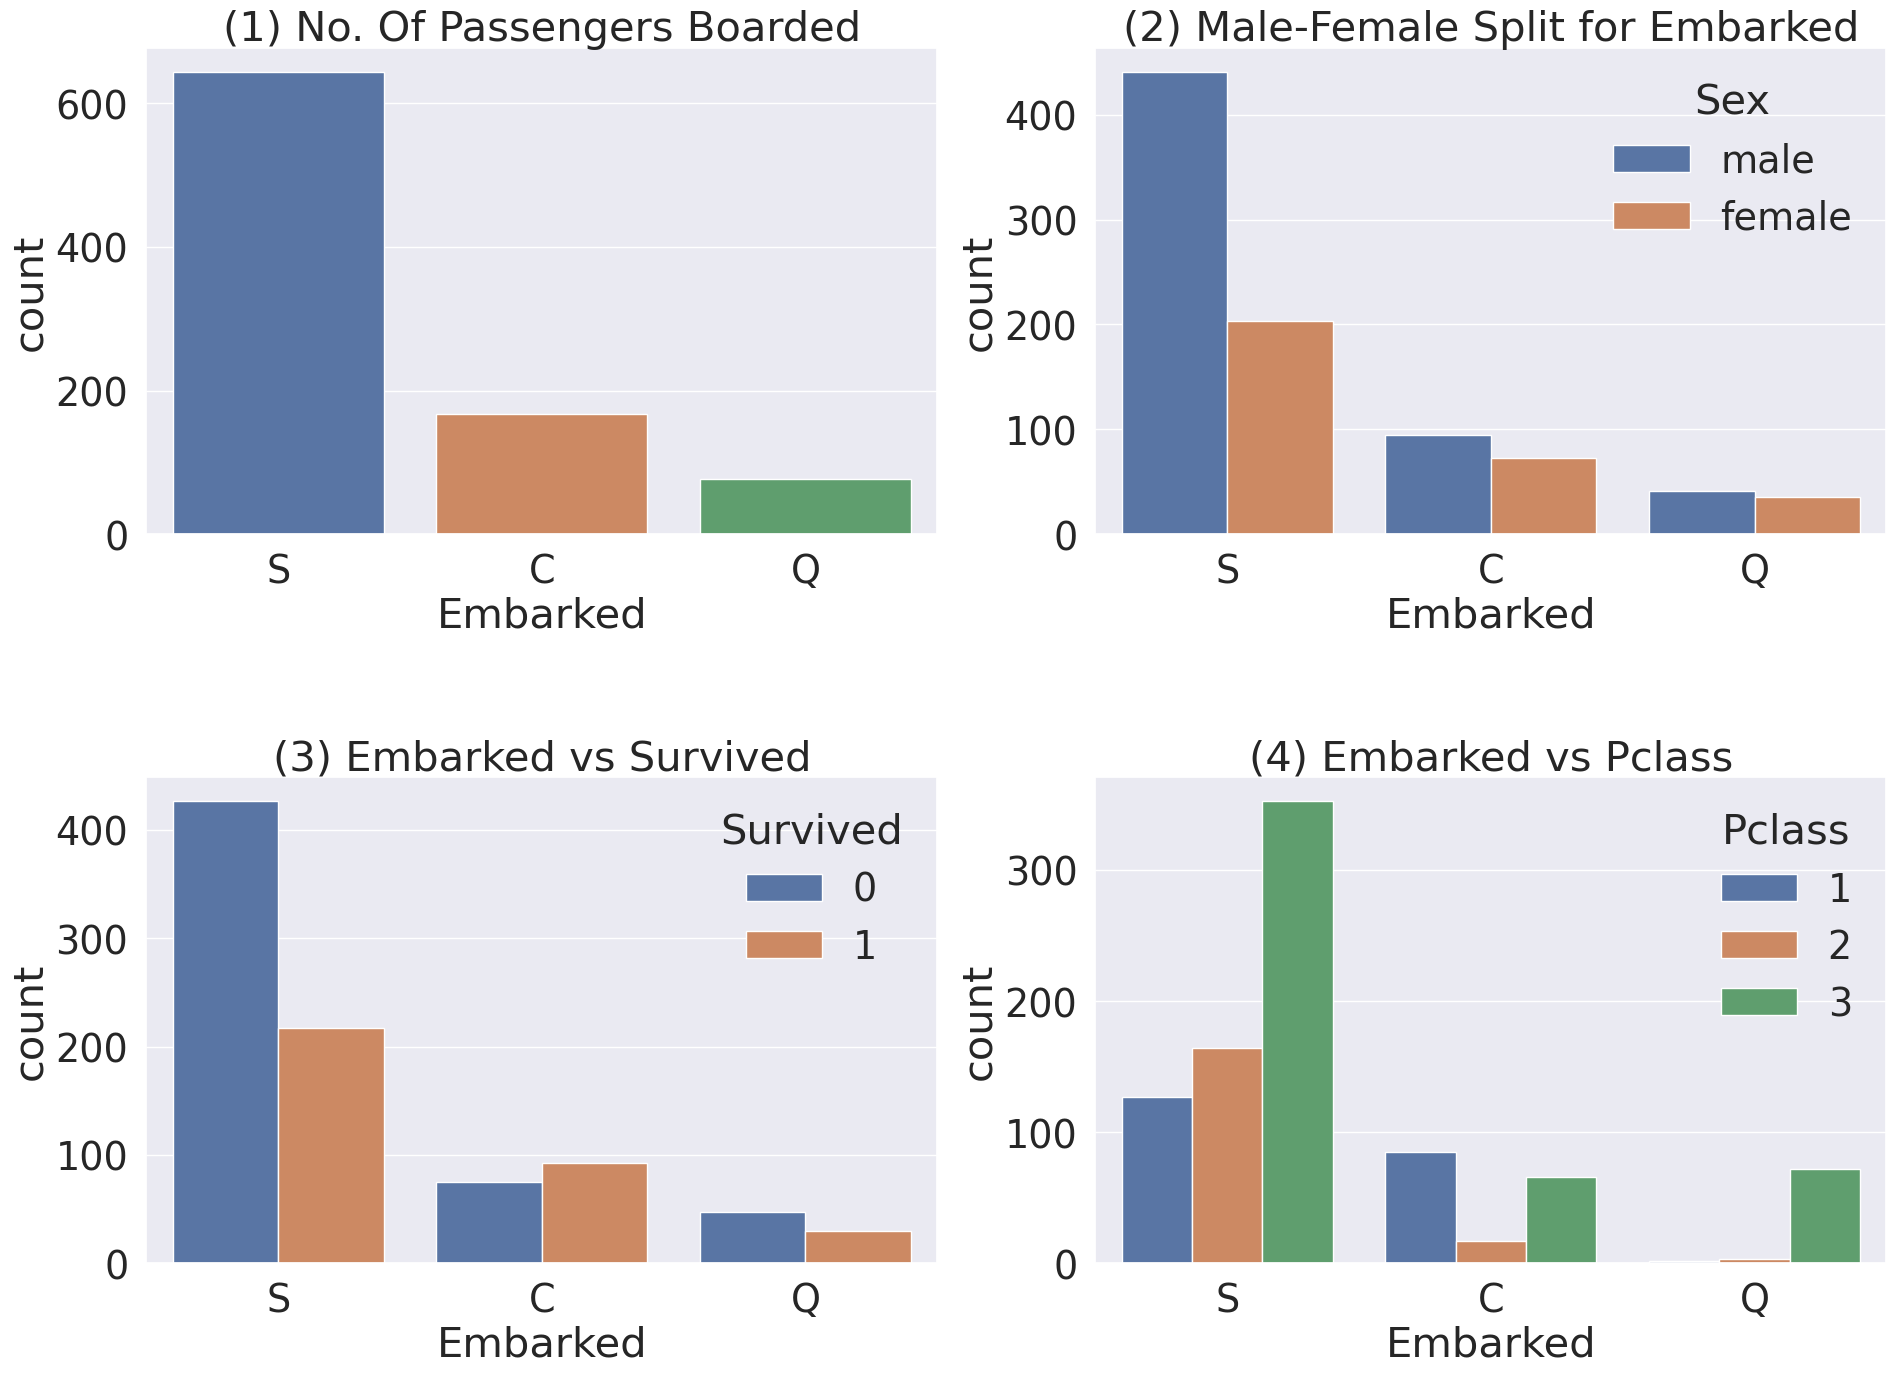

In [99]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 1) 전체적으로 S에서 가장 많은 사람이 탑승했다.
* 2) S는 명확히 남자가 더 많고 C,Q는 남녀비율이 비슷하다.
* 3) 생존확률이 S의 경우 많이 낮다.
* 4) C가 생존확률이 높게 나타나는 이유는 클래스가 높은 사람이 많이 탔기 때문으로 보인다. S는 상대적으로 많은 3rd클래스가 탔기 때문이다.

# 2.7 Family - sibsp + Parch
* sibsp + Parch을 합하면 Family, 합쳐서 분석해본다.

In [100]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 본인포함 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 본인포함 +1

In [101]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


* familysize에 따라서 생존율이 어떤 영향을 미치는지 확인해본다

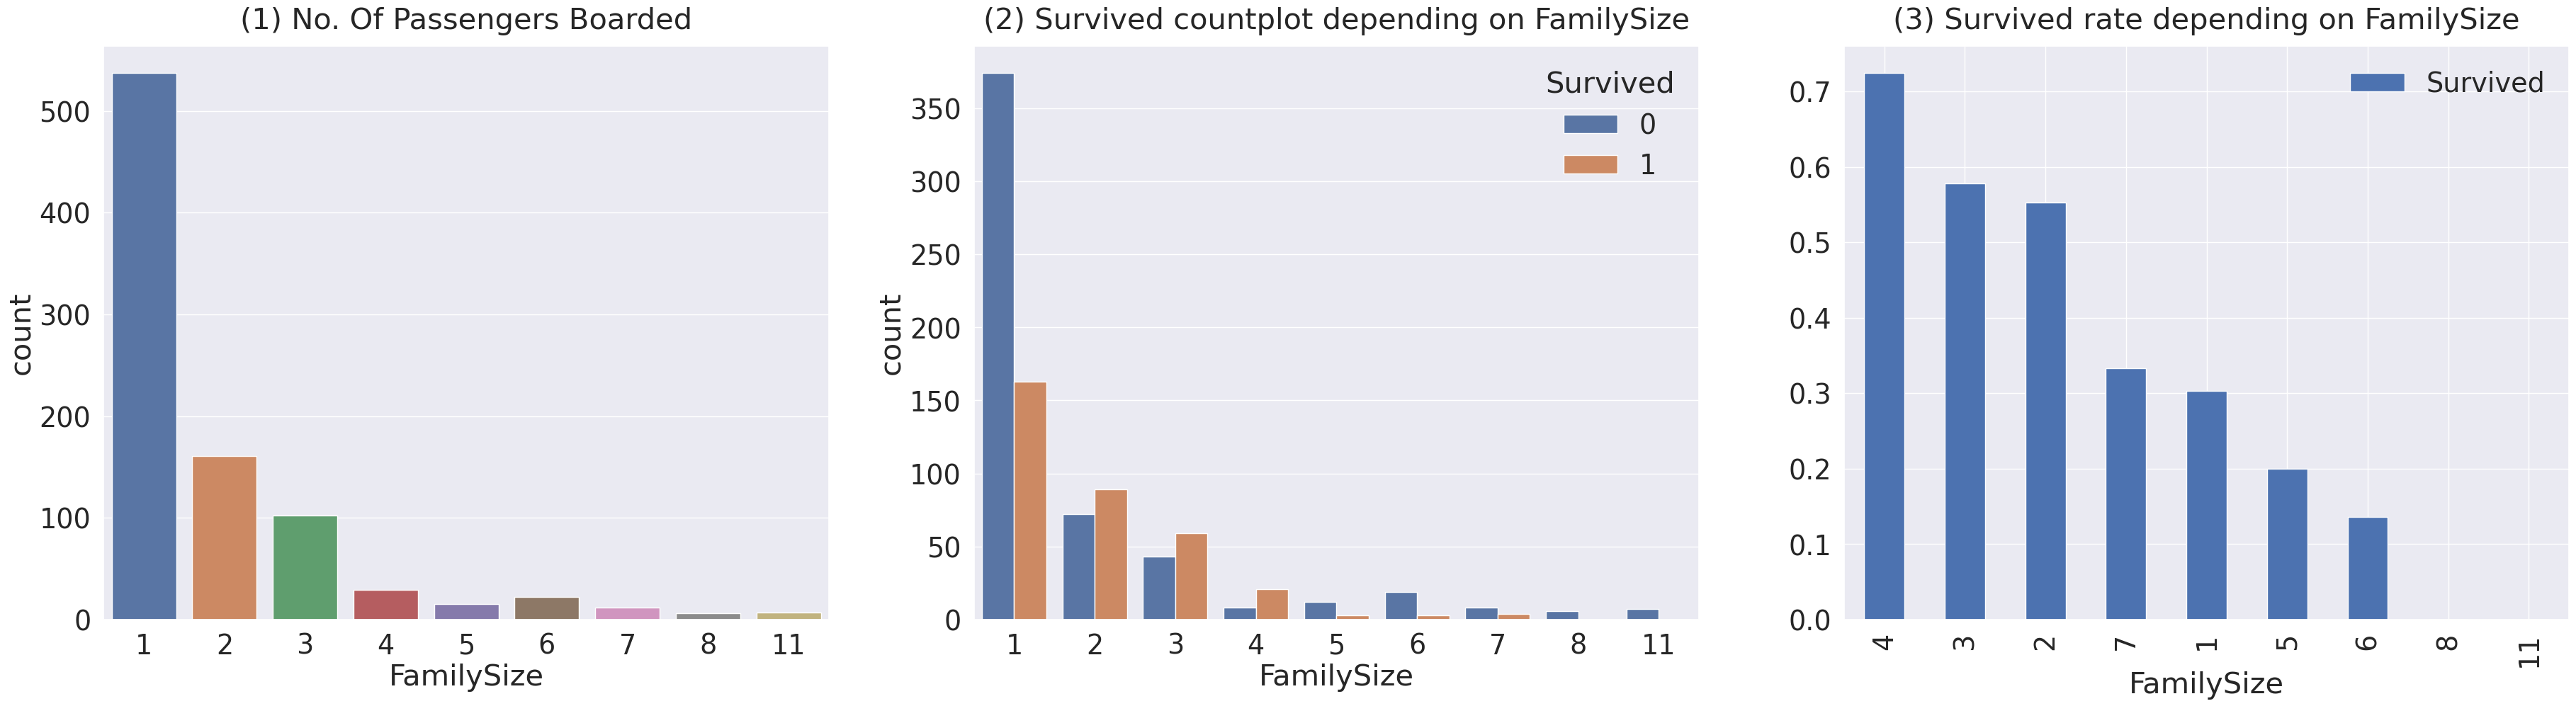

In [103]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 1) 대부분 1명이다.
* 2),3) 가족의 크기에 따른 생존확률 비교이다. 가족이 4명인 경우가 가장 생존확률이 높다.
* 가족수가 너무 커도 생존확률이 낮고, 2,3,4명정도에서 높은 것을 확인할 수 있다.

# 2.8 Fare
* 탑승요금 히스토그램을 그려 살펴봄

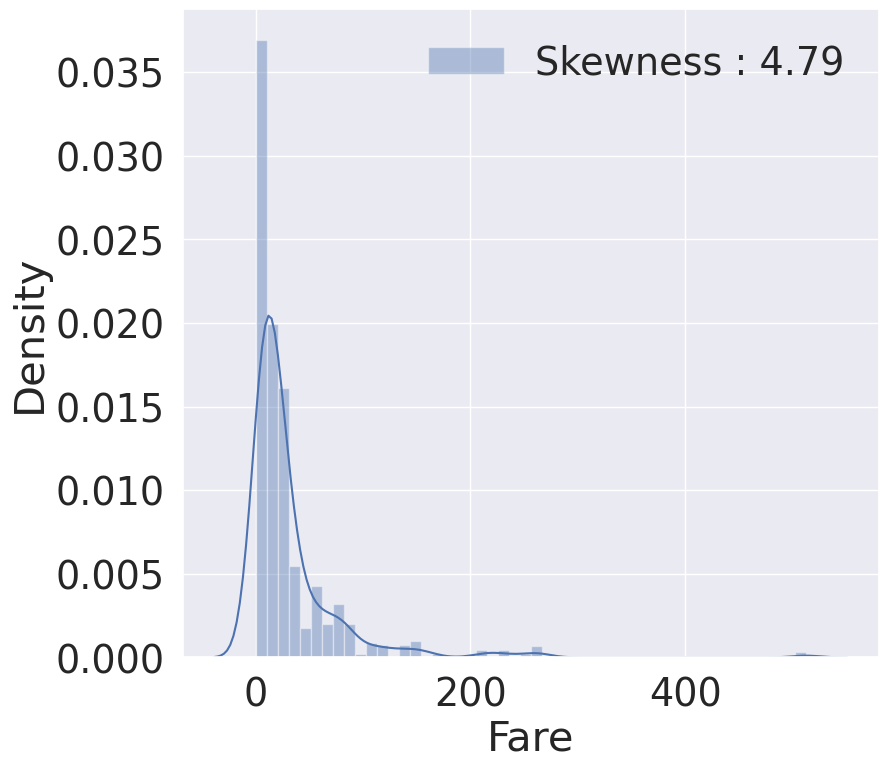

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* 분포가 비대칭인것을 확인할 수 있다.
* fare columns의 모든 데이터에 로그를 취해서 분포를 맞춰준다.

In [105]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

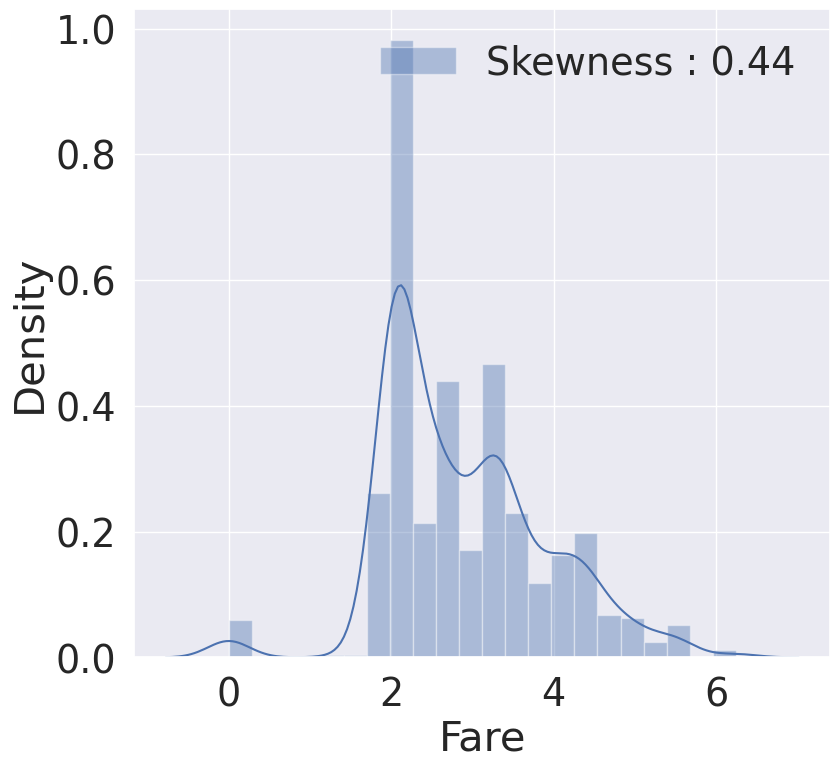

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log를 취해 비대칭성이 많이 완화되었다.
* 모델이 좀 더 좋은 성능을 낼 수 있다.(feature engineering)
* feature engineering : feature들에 조작을 가하거나 새 feature를 추가하는것을 말한다,

# 2.9 Cabin
* 위에서 확인한 것과 같이 80%정도가 NaN값이다. 생존률에 영향을 줄만한 정보를 얻어내지 못한다고 판단한다.
* 모델에 포함시키지 않는다.

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


# 3. Feature engineering
* null data를 채워주는 작업 진행.
* null data를 포함하는 feature의 statistics를 참고하는 등,
* train, test data 모두에 적용해주어야 한다. (실제 모델의 학습에 쓰려고 하는 것이기 때문이다.)

# 3.1 Fill Null
* age에 null 177개 존재한다.
* title과 statistics를 이용해본다.
* data를 string으로 바꿔주는 str메서드, 정규 표현식을 적용하도록 해주는 extract 메서드 있음.
* 이를 이용해 title을 Initial column에 저장해본다

In [109]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') 

* crosstab을 이용해 추출한 init과 sex 간의 count를 본다.

In [110]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking init- with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* 남자와 여자가 쓰는 initial을 구분해본다.
* replace 사용

In [111]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [112]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* 여자 (miss, mrs 등) initial이 생존율이 높은 것 확인가능.

<Axes: xlabel='Initial'>

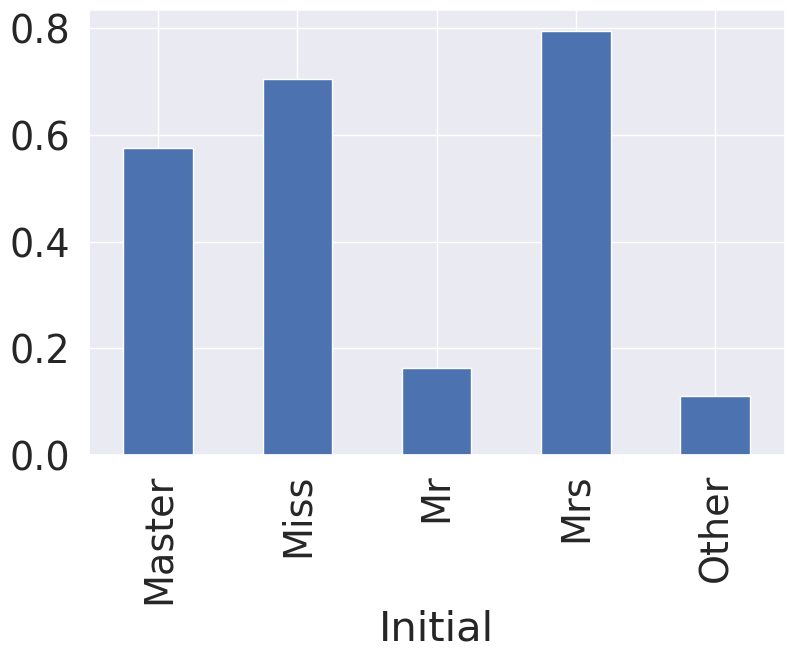

In [113]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* test는 unseen 상태로 두고 train의 statistics를 기반으로 test의 null data를 채워준다.

In [114]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* age의 평균을 이용하여 NUll value를 채워준다.

In [115]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46


df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46